In [1]:
import matplotlib.pyplot as plt
from metpy.units import units
from metpy.plots import USCOUNTIES
from cartopy import crs as ccrs
from cartopy.io.img_tiles import GoogleTiles, OSM, Stamen
import cartopy.feature as cfeature
import pygrib
import numpy as np

In [2]:
grib_messages = pygrib.open('ds.snow.bin')
grib_messages.seek(0)

def accumulator():
    accumulator = np.zeros(np.shape(grib_messages[1].values))
    for message in grib_messages:
        message_number = message.messagenumber
        accumulator = np.add(accumulator, (grib_messages[message_number].values * units('m').to('inch')))
    
    return accumulator

snow = accumulator()

/Users/rhawthorne/miniconda3/envs/metpy_v1/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


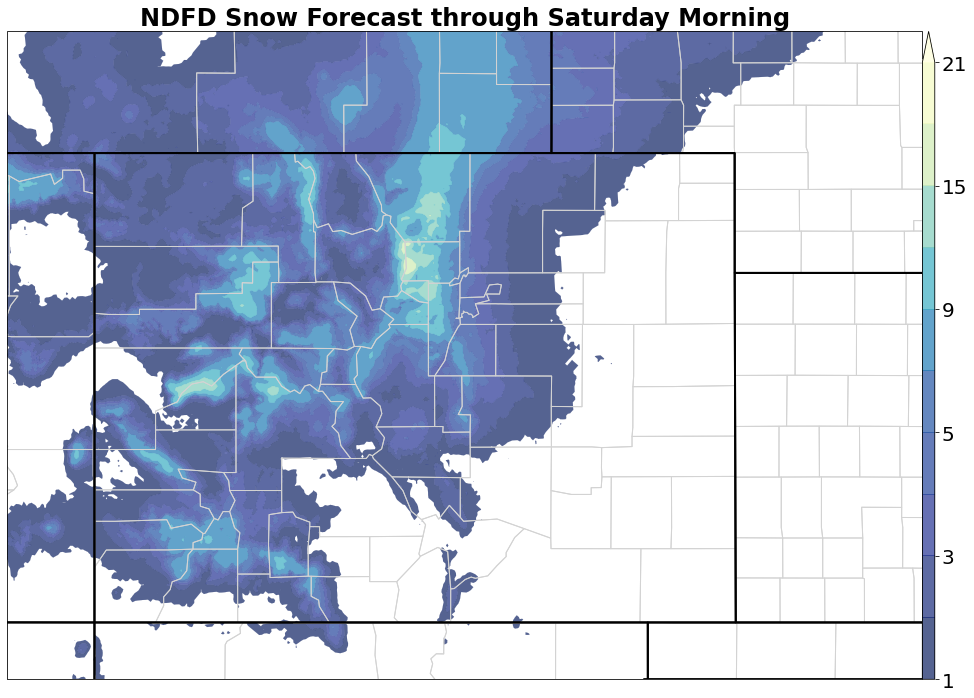

In [27]:
lats, lons = grib_messages[1].latlons()
data_crs = ccrs.Mercator()

image = Stamen(style='toner')

fig = plt.figure(figsize=(16, 9))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)
ax.set_extent([-110, -100, 36.5, 42])

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color='black', linewidth=1, zorder=10,)
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='lightgray', linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=2)
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray', zorder=5)

# range_light_qpf = np.arange(0.01, 0.06, 0.05)
# range_heavy_qpf = np.arange(0.10, 2.00, 0.05)
# qpf = np.concatenate((range_light_qpf, range_heavy_qpf))

range_light_snow = np.arange(1, 6, 1)
range_heavy_snow = np.arange(6, 24, 3)
qpf = np.concatenate((range_light_snow, range_heavy_snow))

contour_fill = ax.contourf(lons, lats, snow, qpf, extend='max',
                           cmap=plt.cm.YlGnBu_r, alpha=0.7, antialiased=True, 
                           transform=ccrs.PlateCarree())


for c in contour_fill.collections:
    c.set_edgecolor('face')
    c.set_linewidths(0.15)

cbar = plt.colorbar(contour_fill, orientation='vertical', pad=0, aspect=50)
cbar.ax.tick_params(labelsize=20)

plt.title('NDFD Snow Forecast through Saturday Morning', fontsize=24, fontweight='bold')
plt.savefig('snow.png', dpi=72)